In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') 

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



# Load and Check Data

In [2]:
data=pd.read_csv('../input/videogamesales/vgsales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [6]:
data.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Variable Description

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

In [8]:
# unique values of categorical titles
for i in data.select_dtypes(include=(object)).columns:
    print(f"{i}:\n{data[i].unique()} \n{'*'*50}")

Name:
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2'] 
**************************************************
Platform:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
**************************************************
Genre:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] 
**************************************************
Publisher:
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainmen

# Missing Value

In [9]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

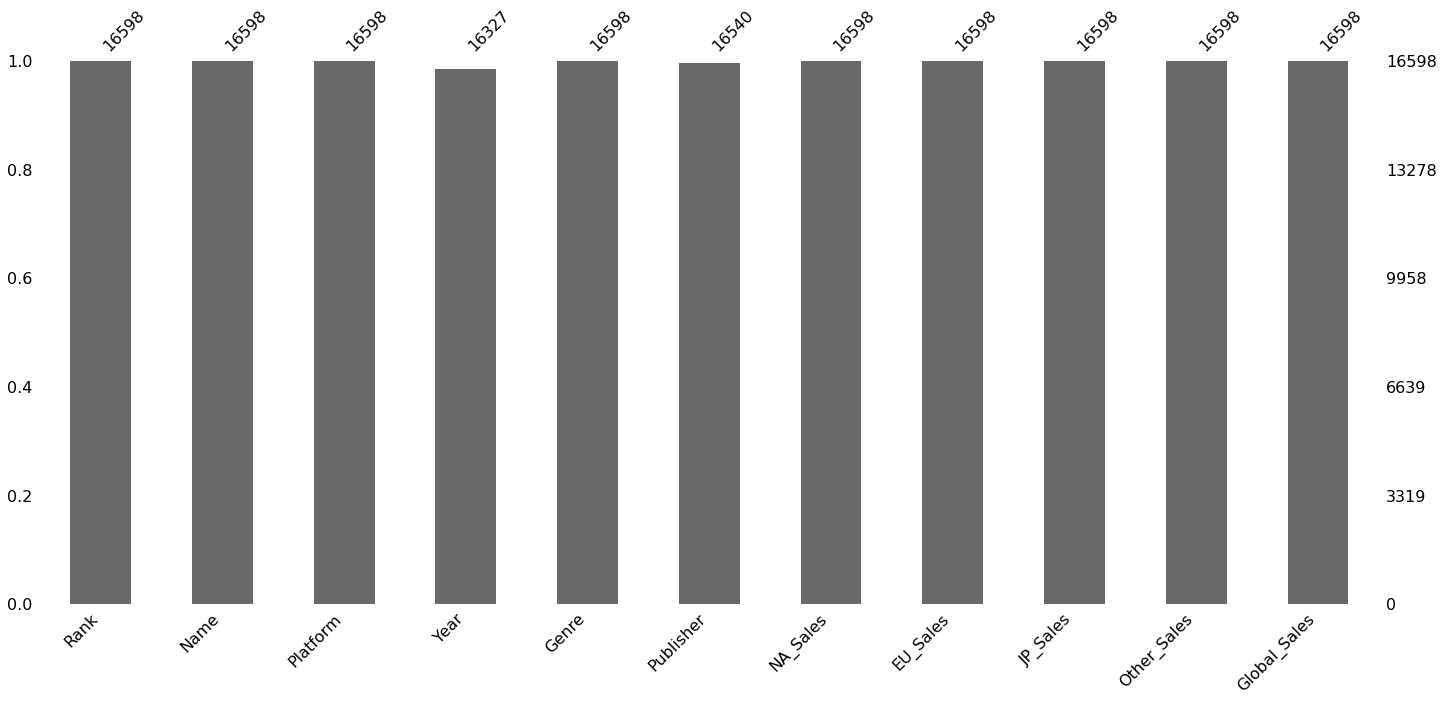

In [10]:
msno.bar(data)
plt.show()

In [11]:
data.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [12]:
data[data.Publisher.isnull()].iloc[:5,:]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


In [13]:
data.Publisher.value_counts().head(20)

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64

In [14]:
round(np.mean(data.Year),0)

2006.0

In [15]:
# fill Missing Value
data.Publisher=data.Publisher.fillna('Unknown')
data.Year=data.Year.fillna(round(np.mean(data.Year),0)) 


In [16]:
data[data.Publisher.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [17]:
data.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

# Univariate Description Analysis

* Numeric variable: Rank , Year , NA_Sales , EU_Sales , JP_Sales , Other_Sales , Global_Sales
* Categorical variable: Name , Platform , Genre , Publisher

In [18]:
data_numeric=data.select_dtypes(include=np.number)
data_categorical=data.select_dtypes(include=object)

# Numeric Description

In [19]:
# average sales over the years
data_numeric[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].groupby(['Year'],as_index=False).mean().sort_values(by='Global_Sales',ascending=False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,1989.0,2.655882,0.496471,1.080000,0.088235,4.320588
5,1985.0,2.409286,0.338571,1.040000,0.065714,3.852857
4,1984.0,2.377143,0.150000,1.019286,0.050000,3.597143
8,1988.0,1.591333,0.439333,1.050667,0.066000,3.148000
10,1990.0,1.591250,0.476875,0.930000,0.087500,3.086875
12,1992.0,0.787674,0.272326,0.672326,0.038372,1.771163
6,1986.0,0.595238,0.135238,0.943333,0.091905,1.765238
7,1987.0,0.528750,0.088125,0.726875,0.012500,1.358750
0,1980.0,1.176667,0.074444,0.000000,0.013333,1.264444
3,1983.0,0.456471,0.047059,0.476471,0.008235,0.987647


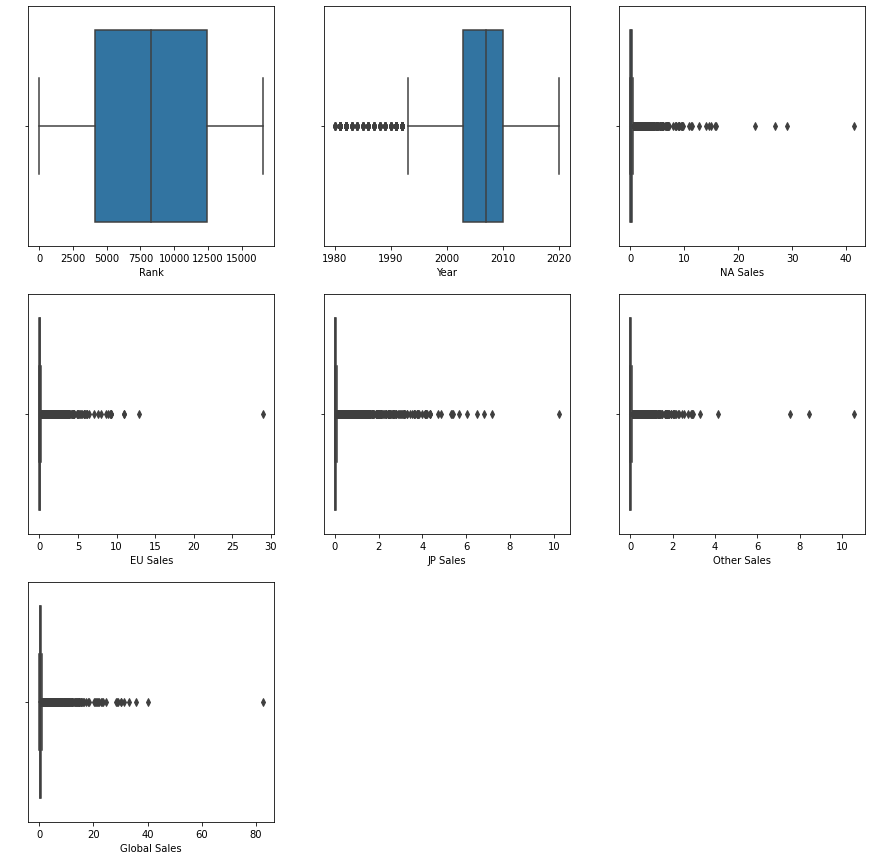

In [20]:
plt.figure(figsize=(15,15))
col=data_numeric.columns     
for i in range(len(col)):
        
    plt.subplot(3,3,i+1)
    
    sns.boxplot(x=data[col[i]])
       
    plt.xlabel(col[i].replace('_'," "))
    plt.ylabel(' ')

# Categorical Description

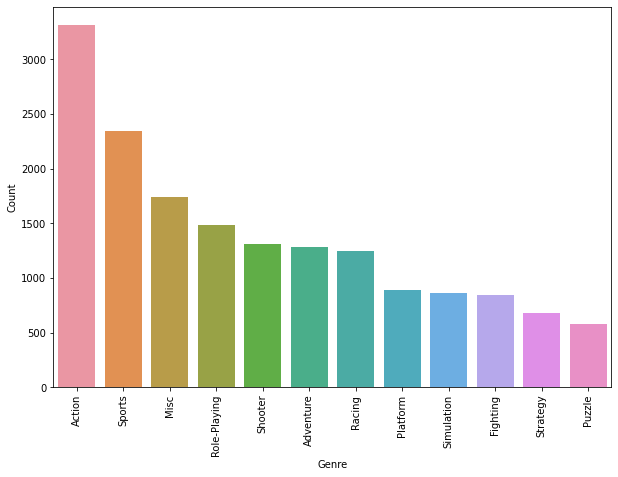

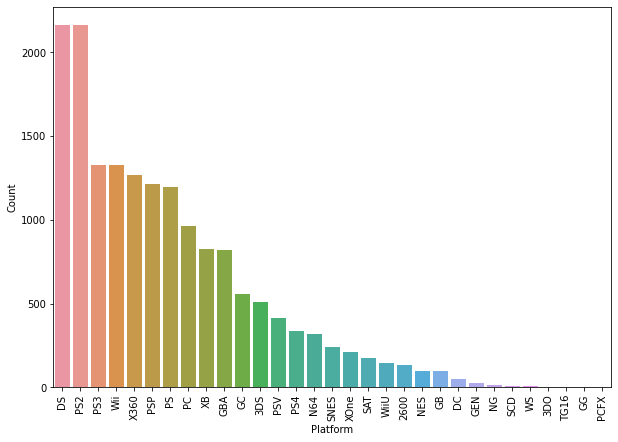

In [21]:
# Genre and Platform count
a=["Genre","Platform"]
for i in a:
    plt.figure(figsize=(10,7))
    sns.barplot(x=data_categorical[i].value_counts().index,y=data_categorical[i].value_counts().values)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

### 20 Publishers with the Most Games 

In [22]:
publishers=data_categorical.Publisher.value_counts().head(20)
publishers

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Unknown                                    261
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Name: Publisher, dtype: int64

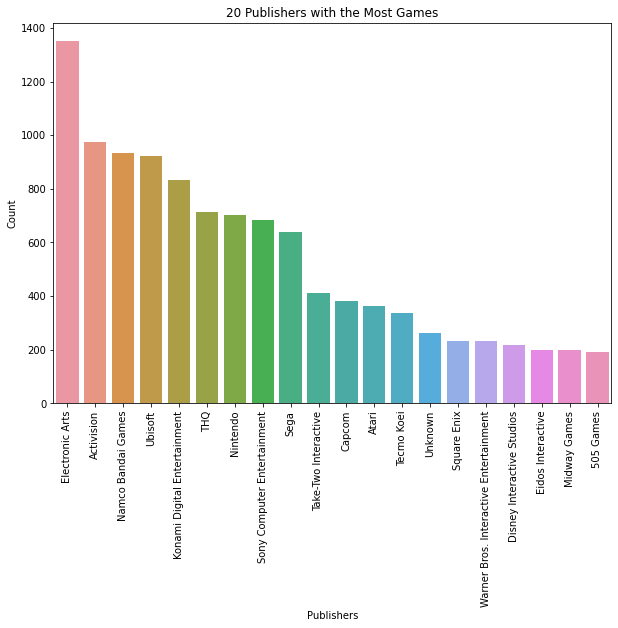

In [23]:
plt.figure(figsize=(10,7))

sns.barplot(x=publishers.index,y=publishers.values)
plt.xticks(rotation=90)
plt.xlabel('Publishers')
plt.ylabel('Count')
plt.title("20 Publishers with the Most Games")
plt.show()

# Visualization

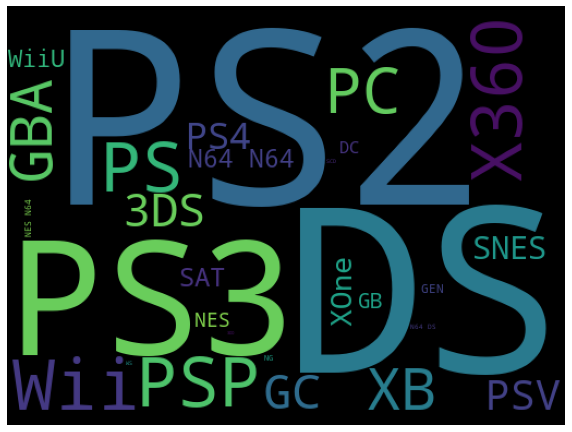

In [24]:
# word cloud for Publishers
plt.subplots(figsize=(10,15))
wordcloud=WordCloud(background_color="black",
                    width=512,
                    height=384).generate(' '.join(data.Platform))
plt.imshow(wordcloud)
plt.axis("off")

plt.savefig('graph.png')
plt.show()

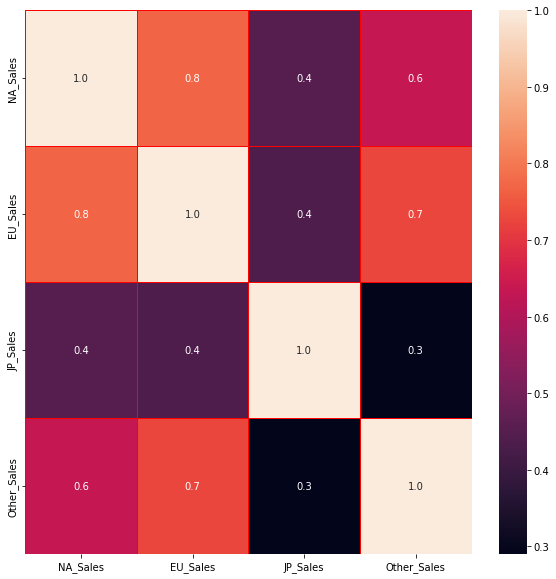

In [25]:
sales=data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sales.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Top 20 Publisher and Sales

In [26]:
list_publisher=list(publishers.index)
d_publisher=data[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Publisher'],as_index=False).sum()


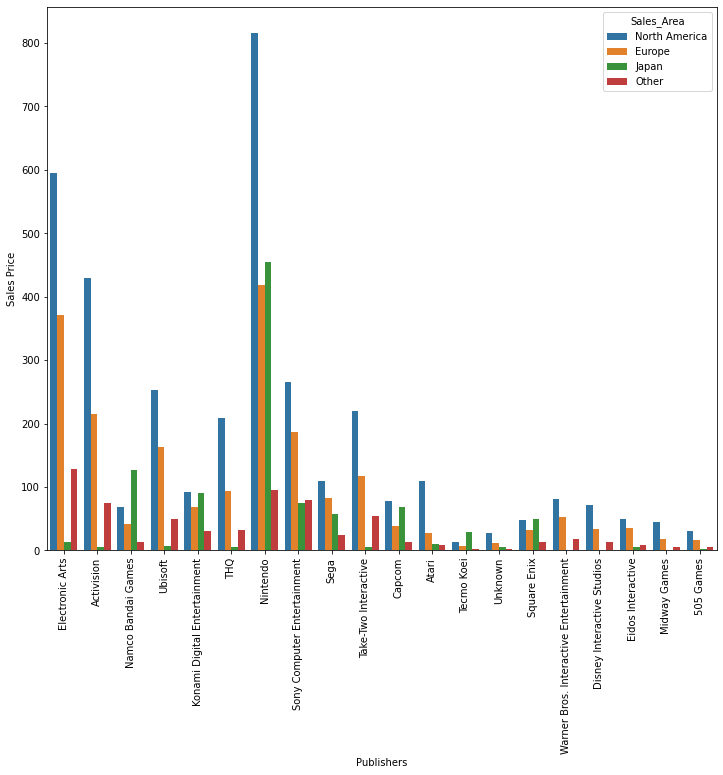

In [27]:

publisher_NA_Sales=[]
publisher_EU_Sales=[]
publisher_JP_Sales=[]
publisher_Other_Sales=[]

for i in list_publisher:
    publisher=d_publisher[d_publisher.Publisher==i]
    publisher_NA_Sales.append(int(publisher.NA_Sales))
    publisher_EU_Sales.append(int(publisher.EU_Sales))
    publisher_JP_Sales.append(int(publisher.JP_Sales))
    publisher_Other_Sales.append(int(publisher.Other_Sales))
    
new_publishers=pd.DataFrame({'Publishers':list_publisher,'North America':publisher_NA_Sales,
                             'Europe':publisher_EU_Sales,
                             'Japan':publisher_JP_Sales,'Other':publisher_Other_Sales})

top20_publisher=pd.melt(new_publishers,id_vars=['Publishers'],value_vars=['North America', 'Europe', 'Japan', 'Other'],
                    var_name='Sales_Area', value_name='Sales_Price')

plt.figure(figsize=(12,10))
sns.barplot(data=top20_publisher,x='Publishers',y='Sales_Price',hue='Sales_Area')
plt.ylabel('Sales Price')
plt.xticks(rotation=90)
plt.show()

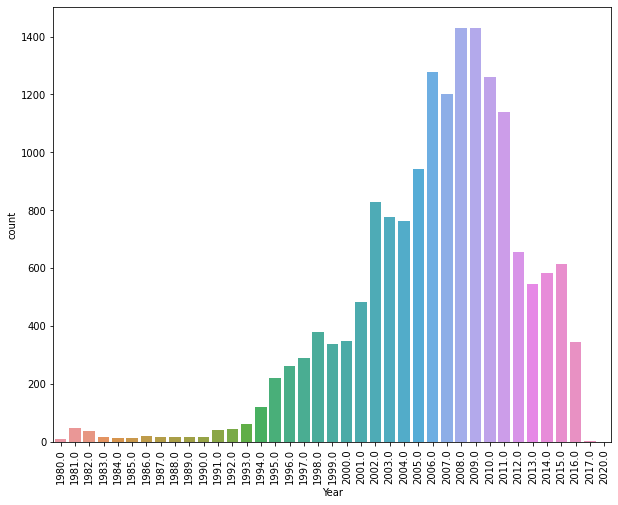

In [28]:
# Number of video games by year 
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Year')
plt.xticks(rotation=90)
plt.show()


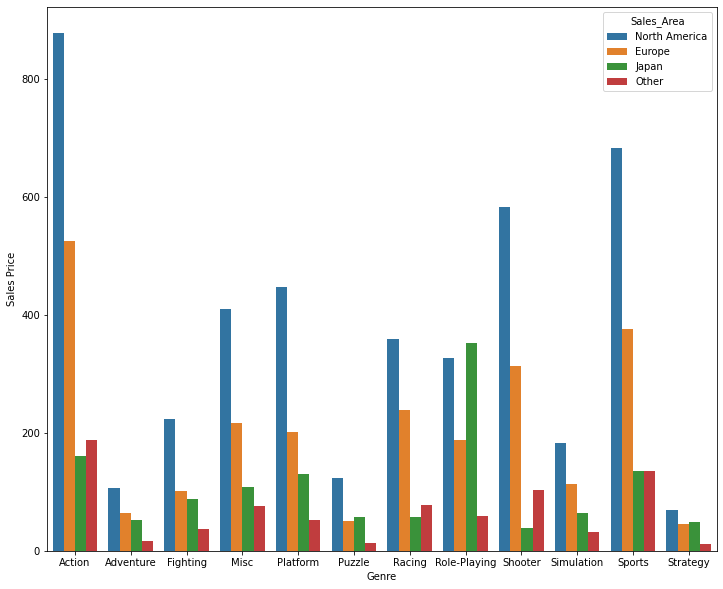

In [29]:
# Total Sales by Genres
genre_sales=data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Genre'],as_index=False).sum()
genre_sales=genre_sales.set_axis(['Genre', 'North America', 'Europe', 'Japan','Other'], axis=1, inplace=False)
Genre_Sales=pd.melt(genre_sales,
                    id_vars=['Genre'],
                    value_vars=['North America', 'Europe', 'Japan', 'Other'],
                    var_name='Sales_Area', value_name='Sales_Price')
plt.figure(figsize=(12,10))
sns.barplot(data=Genre_Sales,x='Genre',y='Sales_Price',hue='Sales_Area')
plt.ylabel('Sales Price')
plt.show()

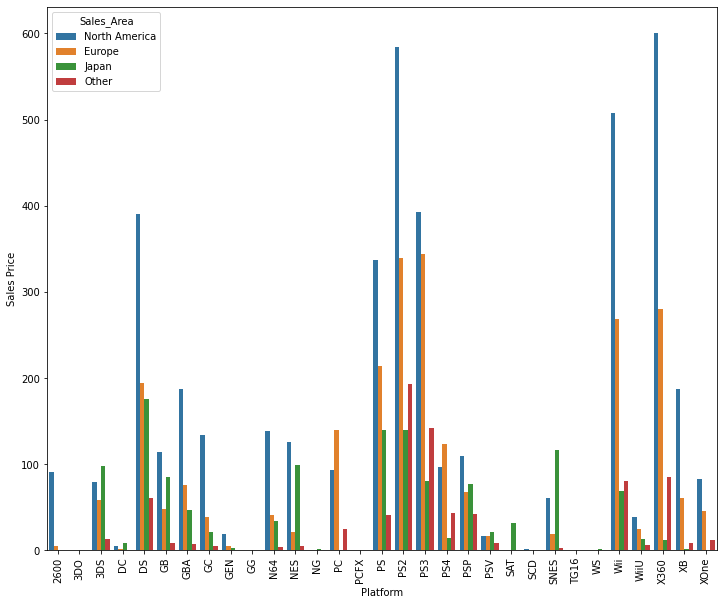

In [30]:
# Total Sales by Platforms
platform_sales=data[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Platform'],as_index=False).sum()
platform_sales=platform_sales.set_axis(['Platform', 'North America', 'Europe', 'Japan','Other'], axis=1, inplace=False)
Platform_Sales=pd.melt(platform_sales,
                    id_vars=['Platform'], 
                    value_vars=['North America', 'Europe', 'Japan', 'Other'],
                    var_name='Sales_Area', value_name='Sales_Price')
plt.figure(figsize=(12,10))
sns.barplot(data=Platform_Sales,x='Platform',y='Sales_Price',hue='Sales_Area')
plt.ylabel('Sales Price')
plt.xticks(rotation=90)
plt.show()

In [31]:
sales_year=data[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Year'],as_index=False).sum()

trace1 = go.Scatter(
    x=sales_year.Year,
    y=sales_year.NA_Sales,
    name = "North America"
)
trace2 = go.Scatter(
    x=sales_year.Year,
    y=sales_year.EU_Sales,
    xaxis='x2',
    yaxis='y2',
    name = "Europe"
)
trace3 = go.Scatter(
    x=sales_year.Year,
    y=sales_year.JP_Sales,
    xaxis='x3',
    yaxis='y3',
    name = "Japan"
)
trace4 = go.Scatter(
    x=sales_year.Year,
    y=sales_year.Other_Sales,
    xaxis='x4',
    yaxis='y4',
    name = "Other"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Total Sales by Year'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)